In [1]:

# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from PIL import Image


In [2]:
DATASET_PATH_TRAIN = 'D:/compress/Prodigy/Task 4/dataset/train/train'
DATASET_PATH_TEST = 'D:/compress/Prodigy/Task 4/dataset/test/test'
IMAGE_SIZE = (64, 64)

In [4]:
# Function to load and preprocess the dataset
def load_dataset(dataset_path, image_size):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))  # Automatically get class names from directory names
    class_to_label = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            print(f"Loading images from {class_path}")
            for filename in os.listdir(class_path):
                if filename.endswith(('.jpg', '.png', '.jpeg')):
                    img_path = os.path.join(class_path, filename)
                    try:
                        img = load_img(img_path, target_size=image_size, color_mode='grayscale')
                        img_array = img_to_array(img)
                        images.append(img_array)
                        labels.append(class_to_label[class_name])
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
                else:
                    print(f"Skipping non-image file: {filename}")
        else:
            print(f"Directory not found: {class_path}")
    return np.array(images), np.array(labels), class_names

In [5]:
# Load and preprocess the dataset
train_images, train_labels, class_names = load_dataset(DATASET_PATH_TRAIN, IMAGE_SIZE)
test_images, test_labels, _ = load_dataset(DATASET_PATH_TEST, IMAGE_SIZE)

if train_images.size == 0 or test_images.size == 0:
    raise ValueError("No images loaded. Please check the dataset paths and formats.")

print(f"Number of training images: {train_images.shape[0]}")
print(f"Number of test images: {test_images.shape[0]}")

# Check the unique labels and their range
unique_train_labels = np.unique(train_labels)
unique_test_labels = np.unique(test_labels)
print(f"Unique train labels: {unique_train_labels}")
print(f"Unique test labels: {unique_test_labels}")

NUM_CLASSES = len(unique_train_labels)
print(f"Number of classes: {NUM_CLASSES}")

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)

Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\0
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\1
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\10
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\11
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\12
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\13
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\14
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\15
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\16
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\17
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\18
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\19
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\2
Loading images from D:/compress/Prodigy/Task 4/dataset/train/train\3
Loading images from D:/c

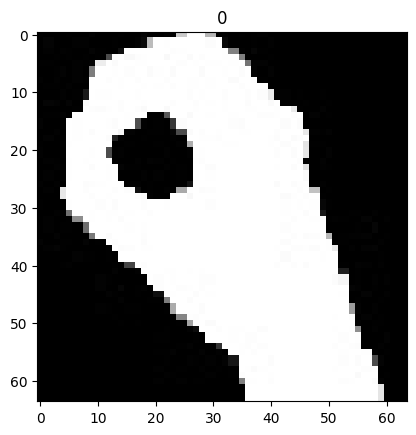

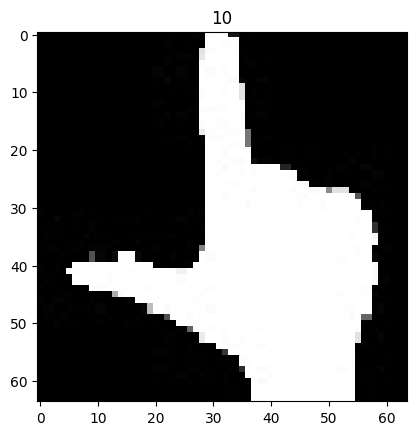

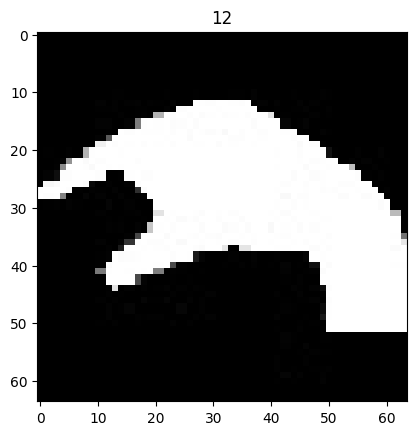

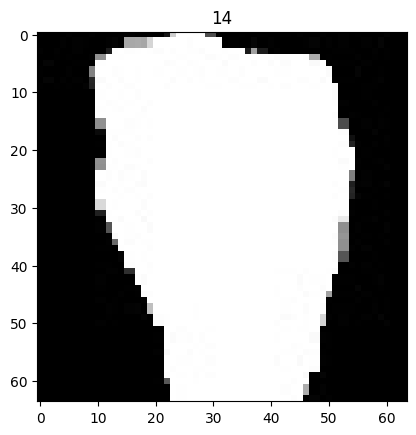

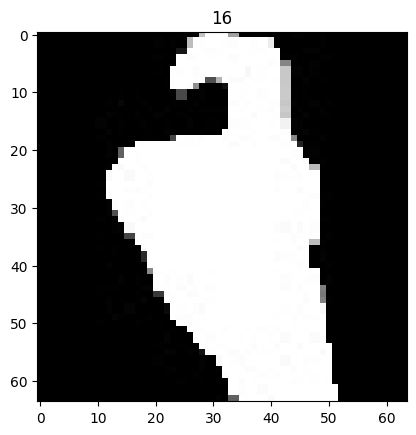

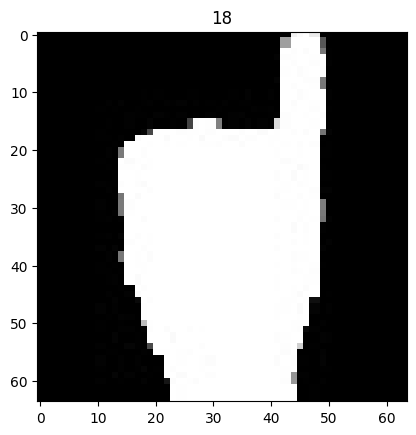

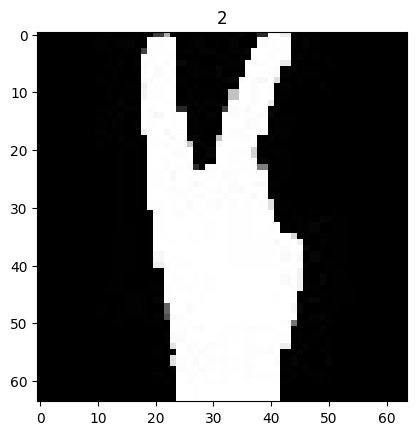

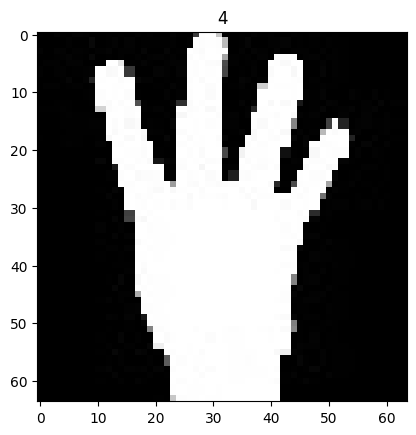

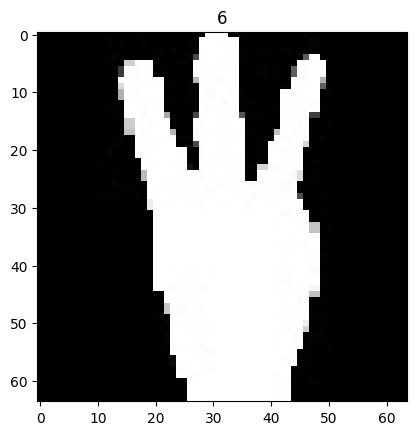

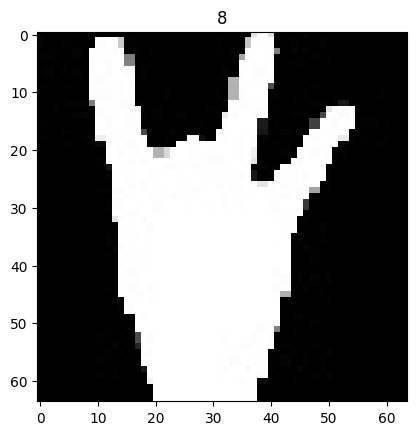

In [6]:
from random import randint
for i in range(0, 10):
    plt.imshow(train_images[i*int(len(train_images)/10), :, :, 0], cmap='gray')
    plt.title(class_names[np.argmax(train_labels[i*int(len(train_images)/10)])])
    plt.show()

In [7]:
# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [8]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])


c:\Users\Celcia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,204 (2.61 MB)

 Trainable params: 685,204 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(val_images, val_labels), callbacks=[early_stopping])

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8114 - loss: 0.6258 - val_accuracy: 0.9997 - val_loss: 5.6972e-04
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9939 - loss: 0.0213 - val_accuracy: 0.9994 - val_loss: 0.0011
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 2.6566e-04
Epoch 4/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9952 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 1.4217e-05
Epoch 5/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.9970 - loss: 0.0080 - val_accuracy: 0.9997 - val_loss: 1.9721e-04
Epoch 6/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 7/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 1.2636e-04
Epoch 8/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.99

In [12]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9994 - loss: 0.0030
Test accuracy: 99.95%


Text(0.5, 1.0, 'Loss Curves')

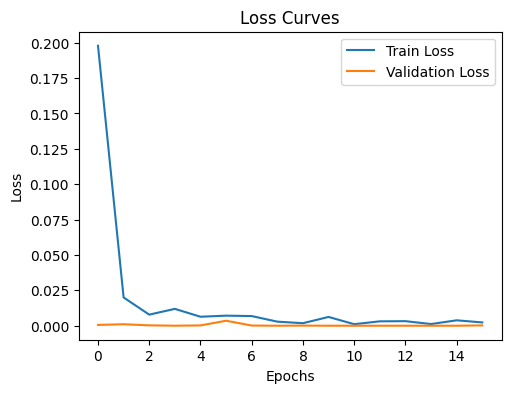

In [13]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

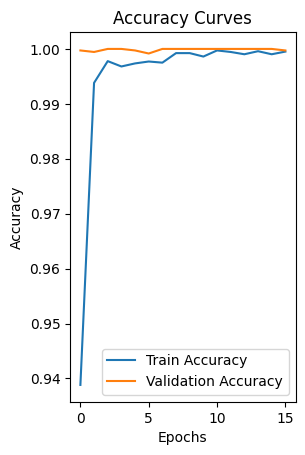

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')
plt.show()

In [15]:
# Predict the labels for the test set
test_predictions = np.argmax(model.predict(test_images), axis=1)
test_labels_true = np.argmax(test_labels, axis=1)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


In [16]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels_true, test_predictions)

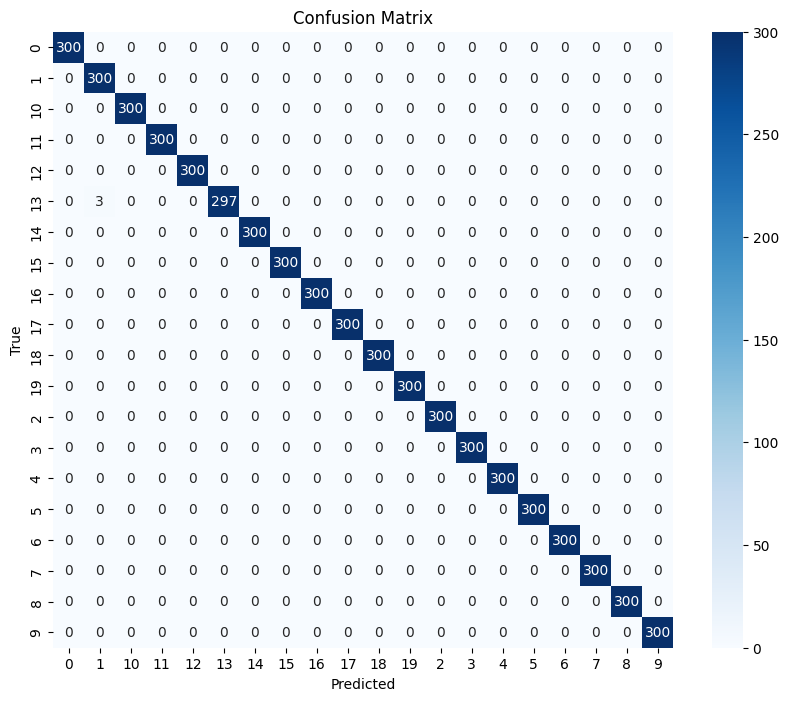

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()